# Movie Budget Scraping and Data Processing

This script performs a detailed process of web scraping and data analysis for movie budgets, actors, directors, production costs, and more. It not only collects missing budget data from Box Office Mojo but also performs various visualizations like top-performing genres, highest-rated movies, and financial success of movies based on box office revenue.

## Requirements

- `requests` - for making HTTP requests to fetch the webpage content.
- `BeautifulSoup` - for parsing HTML content and extracting the required data.
- `pandas` - for handling and processing the movie dataset.
- `winsound` - for generating a beep sound when the process is complete.

## Functionality Overview

The script performs the following main tasks:

1. **Reading Data**: It reads a CSV file containing movie data using `pandas`.
2. **Fetching Budget Information**: It fetches the budget information for each movie using the IMDb ID and scrapes Box Office Mojo.
3. **Updating Missing Data**: It checks the dataset for missing production cost values and fills them by scraping the budget data.
4. **Saving the Processed Data**: It saves the updated dataset to a new CSV file.

### Detailed Functions

#### `fetch_budget(imdb_id: str) -> int`
This function fetches the production budget for a given IMDb ID by scraping Box Office Mojo.

##### Parameters:
- `imdb_id` (str): The IMDb ID of the movie (e.g., `"tt0424880"`).

##### Returns:
- The movie budget as an integer (e.g., `61000000`), or `None` if the budget is not found.

```python
url = f"https://www.boxofficemojo.com/title/{imdb_id}/"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')
budget_section = soup.find('div', class_='a-section a-spacing-none mojo-summary-values mojo-hidden-from-mobile')


In [153]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import os
import winsound

import numpy as np

from io import StringIO
pd.set_option("display.max_columns", 50)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
# which style sheet to use 
style.use('ggplot')

# import ipywidgets library for creating widgets
import ipywidgets as widgets

import matplotlib.pyplot as plt  # Add this line to import matplotlib
from matplotlib.colors import LinearSegmentedColormap

from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [154]:


movie_df = pd.read_csv(r"C:\Users\rotar\OneDrive\Asztali gép\Cubix_Data_Challenge\SQL\MovieMasters\movie_master_clean.csv", delimiter=";")

def fetch_budget(imdb_id: str) -> int:
    """Fetch the 'Budget' from Box Office Mojo using imdb_id.

    :param imdb_id: The ID of the movie (e.g., "tt0424880").
    :return:        Budget as an integer (e.g., 61000000), or None if not found.
    """
    url = f"https://www.boxofficemojo.com/title/{imdb_id}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    budget_section = soup.find('div', class_='a-section a-spacing-none mojo-summary-values mojo-hidden-from-mobile')

    if budget_section:
        for div in budget_section.find_all('div', class_='a-section a-spacing-none'):
            if 'Budget' in div.text:
                try:
                    budget = div.find_all('span')[1].text.strip()
                    return int(budget.replace("$", "").replace(",", ""))
                except (AttributeError, ValueError):
                    return None
    return None


def update_missing_production_cost(movie_df: pd.DataFrame) -> None:
    """Find missing production_cost values, scrape budget, and update the DataFrame in place.

    :param movie_df: The DataFrame containing movie data.
    """
    missing_budget_rows = movie_df['production_cost'].isna()

    for index in movie_df[missing_budget_rows].index:
        imdb_id = movie_df.at[index, 'imdb_id']
        budget = fetch_budget(imdb_id)

        if budget:
            movie_df.at[index, 'production_cost'] = budget
            print(f"Updated {imdb_id} with budget: {budget}")
        else:
            print(f"No budget found for {imdb_id}")


def process_movie_data(file_path: str) -> None:
    """Reads, processes, updates, and saves the movie dataset.

    :param file_path: Path to the input CSV file.
    """
    movie_df = pd.read_csv(file_path, delimiter=";")

    # Update missing production costs directly in movie_df
    update_missing_production_cost(movie_df)

    # Convert ratings to float
    #movie_df["average_rating"] = movie_df["average_rating"].str.replace(',', '.').astype(float)

    # Filter movies with a rating of 7 or higher
    movie_df_filtered = movie_df[movie_df['average_rating'] >= 7][["imdb_id", "production_cost"]]

   

In [155]:
movie_df

,film_id,imdb_id,title,duration_minutes,year_released,genres,popularity,average_rating,production_cost,box_office_revenue,actor1,actor2,actor3,director,writer,production_company
0,5708,tt0421082,Control,121.0,2007,/dr/,"8,00969","7,5",NaN,8159508,Sam Riley,Samantha Morton,Alexandra Maria Lara,Anton Corbijn,Matt Greenhalgh,Becker International
1,6535,tt0796368,Talk to Me,118.0,2007,/dr/,"7,960831","7,1",NaN,4778376,Don Cheadle,Chiwetel Ejiofor,Taraji P Henson,Kasi Lemmons,Michael Genet,The Mark Gordon Company
2,9503,tt0458455,Pope Joan,149.0,2009,/dr/,"7,289967","6,5",NaN,27412220,John Goodman,Johanna Wokalek,David Wenham,Sönke Wortmann,Heinrich Hadding,Constantin Film
3,9918,tt0385726,Glory Road,118.0,2006,/dr/,"5,244654","7,2",NaN,42647449,Josh Lucas,Derek Luke,Jon Voight,James Gartner,NaN,Walt Disney Pictures
4,10190,tt0787523,Towelhead,111.0,2008,/dr/,"3,376907","6,5",NaN,367638,Summer Bishil,Aaron Eckhart,Toni Collette,Alan Ball,Alan Ball,This Is That Productions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2325,376866,tt1619029,Jackie,100.0,2016,/dr/,"8,362716","6,5",9000000.0,13960394,Natalie Portman,Peter Sarsgaard,Greta Gerwig,Pablo Larraín,Noah Oppenheim,Fox Searchlight Pictures
2326,376867,tt4975722,Moonlight,111.0,2016,/dr/,"14,171675","7,3",4000000.0,65046687,Trevante Rhodes,André Holland,Naomie Harris,Barry Jenkins,Tarell McCraney,Plan B Entertainment
2327,381284,tt4846340,Hidden Figures,127.0,2016,/dr/,"16,816834","7,8",25000000.0,230698791,Taraji P Henson,Octavia Spencer,Janelle Monae,Theodore Melfi,Allison Schroeder,Fox 2000 Pictures
2328,393457,tt2671706,Fences,139.0,2016,/dr/,"11,599716","6,7",24000000.0,64414761,Denzel Washington,Viola Davis,Stephen Henderson,Denzel Washington,August Wilson,Paramount Pictures


In [156]:
print(movie_df['production_cost'].isna().sum())  # Kiírja, hány hiányzó érték van


488


In [157]:
print(movie_df[['imdb_id', 'production_cost']].head(10))


     imdb_id  production_cost
0  tt0421082              NaN
1  tt0796368              NaN
2  tt0458455              NaN
3  tt0385726              NaN
4  tt0787523              NaN
5  tt0445990              NaN
6  tt0796302              NaN
7  tt1037218              NaN
8  tt0888693              NaN
9  tt0847897              NaN


In [158]:
nan_production_cost_rows = movie_df[movie_df['production_cost'].isna()]
nan_production_cost_rows.head(5)

,film_id,imdb_id,title,duration_minutes,year_released,genres,popularity,average_rating,production_cost,box_office_revenue,actor1,actor2,actor3,director,writer,production_company
0,5708,tt0421082,Control,121.0,2007,/dr/,"8,00969","7,5",NaN,8159508,Sam Riley,Samantha Morton,Alexandra Maria Lara,Anton Corbijn,Matt Greenhalgh,Becker International
1,6535,tt0796368,Talk to Me,118.0,2007,/dr/,"7,960831","7,1",NaN,4778376,Don Cheadle,Chiwetel Ejiofor,Taraji P Henson,Kasi Lemmons,Michael Genet,The Mark Gordon Company
2,9503,tt0458455,Pope Joan,149.0,2009,/dr/,"7,289967","6,5",NaN,27412220,John Goodman,Johanna Wokalek,David Wenham,Sönke Wortmann,Heinrich Hadding,Constantin Film
3,9918,tt0385726,Glory Road,118.0,2006,/dr/,"5,244654","7,2",NaN,42647449,Josh Lucas,Derek Luke,Jon Voight,James Gartner,NaN,Walt Disney Pictures
4,10190,tt0787523,Towelhead,111.0,2008,/dr/,"3,376907","6,5",NaN,367638,Summer Bishil,Aaron Eckhart,Toni Collette,Alan Ball,Alan Ball,This Is That Productions


In [159]:
len(movie_df[~movie_df['production_cost'].isna()])

1842

In [160]:
nan_production_cost_rows = nan_production_cost_rows[['imdb_id', 'production_cost']]

In [161]:
nan_production_cost_rows.head()

,imdb_id,production_cost
0,tt0421082,NaN
1,tt0796368,NaN
2,tt0458455,NaN
3,tt0385726,NaN
4,tt0787523,NaN


### Loop through all the missing IDs

In [162]:
for index, row in nan_production_cost_rows.iterrows():
    imdb_id = row['imdb_id']
    budget = fetch_budget(imdb_id)

    if budget:
        # Clean the budget string (e.g., "$61,000,000" -> 61000000)
        try:
            cleaned_budget = int(budget.replace("$", "").replace(",", ""))
            # Update the production_cost column in the original DataFrame
            nan_production_cost_rows.at[index, 'production_cost'] = cleaned_budget
            print(f"Updated {imdb_id} with budget: {cleaned_budget}")
        except (AttributeError, ValueError):
            print(f"Failed to clean budget for {imdb_id}: {budget}")
    else:
        print(f"No budget found for {imdb_id}")

No budget found for tt0421082
No budget found for tt0796368
No budget found for tt0458455
No budget found for tt0385726
No budget found for tt0787523
No budget found for tt0445990
No budget found for tt0796302
No budget found for tt1037218
No budget found for tt0888693
No budget found for tt0847897
No budget found for tt0822849
No budget found for tt0948535
No budget found for tt0810951
No budget found for tt1183923
No budget found for tt1054580
No budget found for tt1422020
Failed to clean budget for tt1405500: 21000000
No budget found for tt1322264
No budget found for tt1366409
No budget found for tt0829098
No budget found for tt1312254
No budget found for tt1530975
No budget found for tt1533013
No budget found for tt1450328
No budget found for tt1683526
No budget found for tt1802197
No budget found for tt0455323
No budget found for tt1870529
No budget found for tt1720182
No budget found for tt1827578
No budget found for tt1907731
No budget found for tt1781840
No budget found for tt0

In [163]:

movie_df['average_rating'] = movie_df['average_rating'].str.replace(',', '.').astype(float)


movie_df_filtered = movie_df[movie_df['average_rating'] >= 7]


print(movie_df_filtered.head())


    film_id    imdb_id                 title  duration_minutes  year_released  \
0      5708  tt0421082               Control             121.0           2007   
1      6535  tt0796368            Talk to Me             118.0           2007   
3      9918  tt0385726            Glory Road             118.0           2006   
7     13793  tt1037218  Flashbacks of a Fool             110.0           2008   
14    33997  tt1054580         Desert Flower             120.0           2009   

   genres popularity  average_rating  production_cost  box_office_revenue  \
0    /dr/    8,00969             7.5              NaN             8159508   
1    /dr/   7,960831             7.1              NaN             4778376   
3    /dr/   5,244654             7.2              NaN            42647449   
7    /dr/   3,936673             7.1              NaN             1107542   
14   /dr/   4,290624             7.2              NaN            14631377   

          actor1            actor2                

In [164]:
movie_df_filtered["average_rating"].unique()

array([7.5, 7.1, 7.2, 7. , 7.3, 7.9, 7.4, 7.6, 7.7, 8. , 8.1, 7.8, 8.3,
       8.6, 8.2])

In [165]:
movie_df_filtered = movie_df_filtered[["imdb_id", "production_cost"]]

In [166]:
movie_df_filtered.head()

,imdb_id,production_cost
0,tt0421082,NaN
1,tt0796368,NaN
3,tt0385726,NaN
7,tt1037218,NaN
14,tt1054580,NaN


### Bonus: Data Quality with Great Expectations

**Why it's important** ("Garbage In, Garbage Out"):<br>
AI models learn from data. The quality of data determine how efffectively they can learn.

**Why Data Quality Issues Occur?**<br>
Data is often collected for operational purposes rather than being explicitly designed for analytics, machine learning, or AI. Without clear ownership, no one is accountable for maintaining its accuracy and reliability.

Many organisations struggle with data visibility, teams don't always know what data exists, where it's stored, or how it's being used. This lack of awareness leads to inconsistent or redundant data usage.


In [167]:
from great_expectations.core.batch import Batch
from great_expectations.validator.validator import Validator
from great_expectations.execution_engine.pandas_execution_engine import PandasExecutionEngine
from great_expectations import get_context

In [168]:
# 1. Create a context:
context = get_context()

# 2. Create a Spark Execution Engine
execution_engine = PandasExecutionEngine()

# 3. Create a Batch from the DataFrame
batch = Batch(data=movie_df)

# 4. Create a Validator with the batch and execution engine
validator = Validator(execution_engine=execution_engine, batches=[batch])

# 5. Add expectations
validator.expect_column_values_to_not_be_null(
    column="imdb_id",
)

validator.expect_column_values_to_not_be_null(
    column="production_cost",
)

validator.expect_column_values_to_be_between(
    column="average_rating",
    min_value=0,
    max_value=10
)

# 6. Run validation and get results
results = validator.validate()

# 7. Process results
if results["success"]:
    print("All validations passed!")
else:
    print("Some validations failed.")
    for result in results["results"]:
        print(f"Expectation: {result['expectation_config']['type']}")
        print(f"Success: {result['success']}")
        if not result["success"]:
            print(f"Details: {result['result']}")


c:\Users\rotar\OneDrive\Asztali gép\Cubix_Data_Challenge\venv\Lib\site-packages\great_expectations\expectations\expectation.py:1453: UserWarning: `result_format` configured at the Validator-level will not be persisted. Please add the configuration to your Checkpoint config or checkpoint_run() method instead.
  warnings.warn(
Calculating Metrics: 100%|██████████| 6/6 [00:00<00:00, 222.05it/s]
c:\Users\rotar\OneDrive\Asztali gép\Cubix_Data_Challenge\venv\Lib\site-packages\great_expectations\expectations\expectation.py:1453: UserWarning: `result_format` configured at the Validator-level will not be persisted. Please add the configuration to your Checkpoint config or checkpoint_run() method instead.
  warnings.warn(
Calculating Metrics: 100%|██████████| 6/6 [00:00<00:00, 250.77it/s]
c:\Users\rotar\OneDrive\Asztali gép\Cubix_Data_Challenge\venv\Lib\site-packages\great_expectations\expectations\expectation.py:1453: UserWarning: `result_format` configured at the Validator-level will not be pe

Some validations failed.
Expectation: expect_column_values_to_not_be_null
Success: True
Expectation: expect_column_values_to_not_be_null
Success: False
Details: {'element_count': 2330, 'unexpected_count': 488, 'unexpected_percent': 20.94420600858369, 'partial_unexpected_list': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]}
Expectation: expect_column_values_to_be_between
Success: True


In [169]:
validation_results = results["results"]

results_data = [
    {
        "Expectation": res["expectation_config"]["type"],
        "Column": res["expectation_config"]["kwargs"].get("column"),
        "Success": res["success"],
        "Count": res["result"].get("element_count", "N/A"),
        "Failed Records Count": res["result"].get("unexpected_count", "N/A"),
        "Failed Records %": res["result"].get("unexpected_percent", "N/A"),
    }
    for res in validation_results
]

validation_results_df = pd.DataFrame(results_data)

validation_results_df

,Expectation,Column,Success,Count,Failed Records Count,Failed Records %
0,expect_column_values_to_not_be_null,imdb_id,True,2330,0,0.000000
1,expect_column_values_to_not_be_null,production_cost,False,2330,488,20.944206
2,expect_column_values_to_be_between,average_rating,True,2330,0,0.000000



## Visualizations

### 1. Top 3 Most Expensive Movies by Production Cost
This bar plot displays the top 3 most expensive movies based on their production costs.

### 2. Top 3 Actors by Box Office Revenue
This bar plot shows the top 3 actors based on their movies' box office revenues.

### 3. Top 3 Directors by Box Office Revenue
This bar plot visualizes the top 3 directors based on the box office revenue of their movies.

### 4. Top 3 Production Companies by Box Office Revenue
Here we show the top 3 production companies based on the revenue their movies generated.

### 5. Top 3 Movies by Highest Average Rating
This bar plot displays the movies with the highest average ratings.

## Code Examples

```python
# Add the Python code examples from above...


C:\Users\rotar\AppData\Local\Temp\ipykernel_23652\3051951427.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_expensive_movies,
C:\Users\rotar\AppData\Local\Temp\ipykernel_23652\3051951427.py:18: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=top_3_expensive_movies,


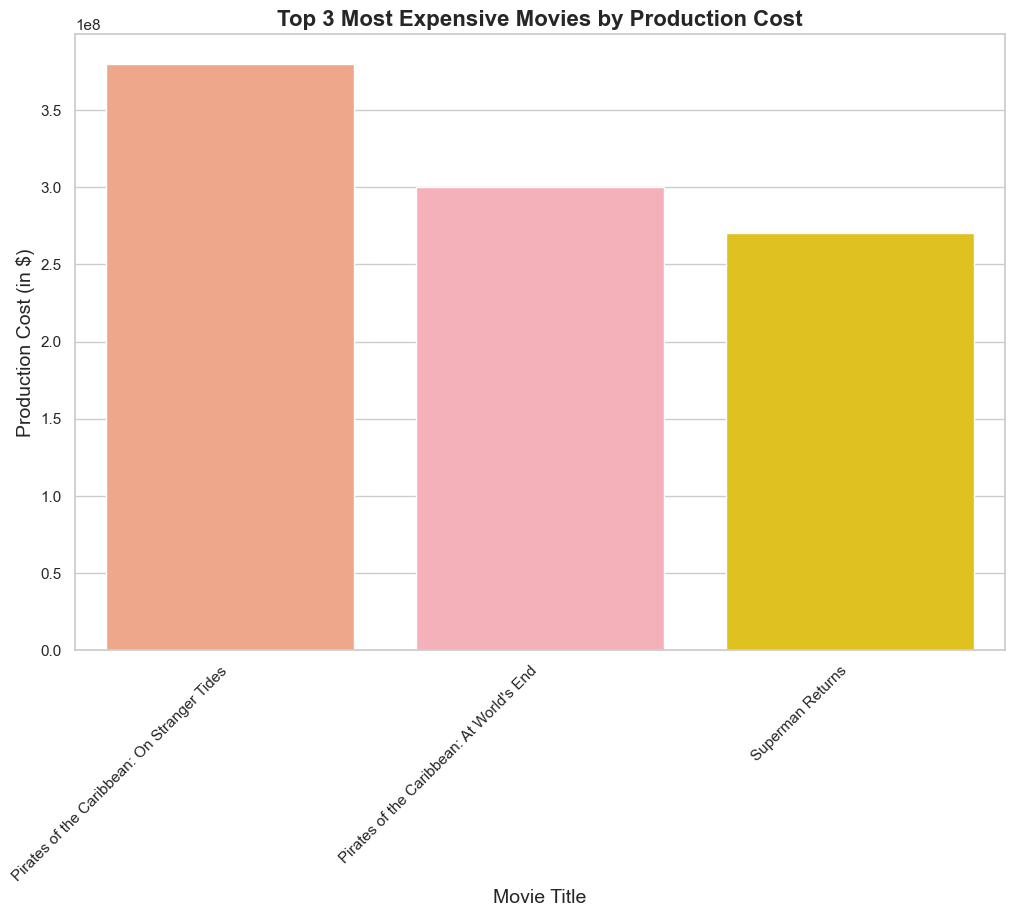

In [170]:

# Set the style of the visualizations
sns.set(style="whitegrid")

# Define a custom vibrant colormap with different colors
vibrant_cmap = LinearSegmentedColormap.from_list('vibrant', 
                                                 ['#ffa07a', '#20b2aa', '#9370db', 
                                                  '#3cb371', '#ff69b4', '#ffdead', 
                                                  '#4682b4', '#ff6347', '#8a2be2', 
                                                  '#ffd700'])

# Top 3 most expensive movies by production cost
top_3_expensive_movies = movie_df[['title', 'production_cost']].dropna().sort_values(by='production_cost', ascending=False).head(3)

# Set up the plot
plt.figure(figsize=(12, 8))

# Create the barplot with the vibrant color palette
sns.barplot(data=top_3_expensive_movies, 
            x='title',  # Use 'title' for x-axis (movie title)
            y='production_cost',  # Use 'production_cost' for y-axis
            palette=vibrant_cmap(np.linspace(0, 1, len(top_3_expensive_movies))))

# Add title and labels
plt.title('Top 3 Most Expensive Movies by Production Cost', fontsize=16, fontweight='bold')
plt.xlabel('Movie Title', fontsize=14)
plt.ylabel('Production Cost (in $)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()




C:\Users\rotar\AppData\Local\Temp\ipykernel_23652\1082739286.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_actors,
C:\Users\rotar\AppData\Local\Temp\ipykernel_23652\1082739286.py:12: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=top_3_actors,


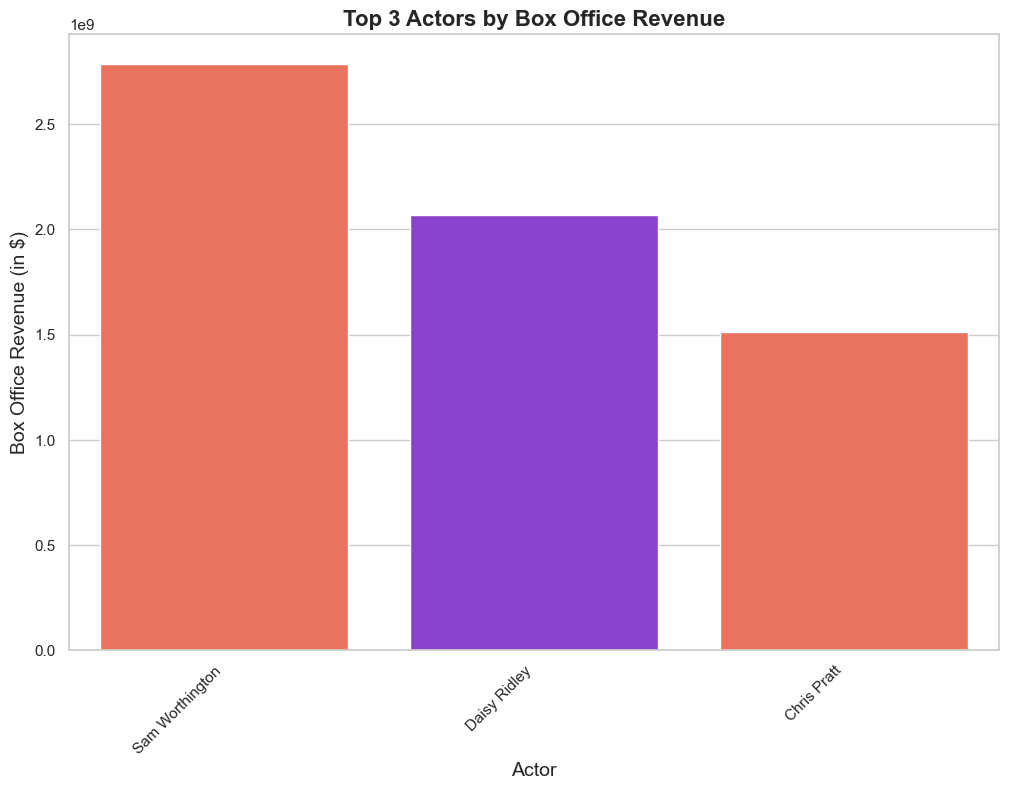

In [171]:
# Top 3 best actors by movie revenue
top_3_actors = movie_df[['actor1', 'box_office_revenue']].dropna().sort_values(by='box_office_revenue', ascending=False).head(3)

# Define a custom vibrant colormap with different colors
vibrant_cmap_actors = LinearSegmentedColormap.from_list('vibrant_actors', 
                                                       ['#ff6347', '#8a2be2', '#ff6347'])

# Set up the plot
plt.figure(figsize=(12, 8))

# Create the barplot with the vibrant color palette
sns.barplot(data=top_3_actors, 
            x='actor1', 
            y='box_office_revenue', 
            palette=vibrant_cmap_actors(np.linspace(0, 1, len(top_3_actors))))

# Add title and labels
plt.title('Top 3 Actors by Box Office Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Actor', fontsize=14)
plt.ylabel('Box Office Revenue (in $)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


C:\Users\rotar\AppData\Local\Temp\ipykernel_23652\2836690723.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_directors,
C:\Users\rotar\AppData\Local\Temp\ipykernel_23652\2836690723.py:12: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=top_3_directors,


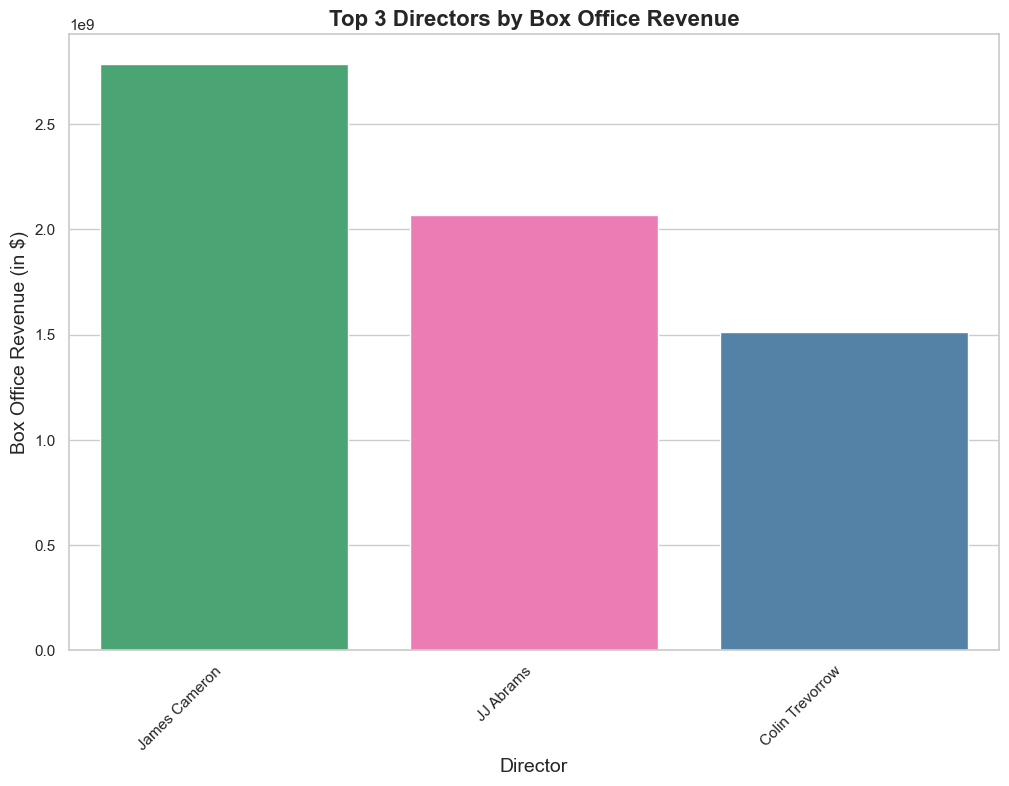

In [172]:
# Top 3 directors by box office revenue
top_3_directors = movie_df[['director', 'box_office_revenue']].dropna().sort_values(by='box_office_revenue', ascending=False).head(3)

# Define a custom vibrant colormap with different colors
vibrant_cmap_directors = LinearSegmentedColormap.from_list('vibrant_directors', 
                                                          ['#3cb371', '#ff69b4', '#4682b4'])

# Set up the plot
plt.figure(figsize=(12, 8))

# Create the barplot with the vibrant color palette
sns.barplot(data=top_3_directors, 
            x='director', 
            y='box_office_revenue', 
            palette=vibrant_cmap_directors(np.linspace(0, 1, len(top_3_directors))))

# Add title and labels
plt.title('Top 3 Directors by Box Office Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Director', fontsize=14)
plt.ylabel('Box Office Revenue (in $)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


C:\Users\rotar\AppData\Local\Temp\ipykernel_23652\994252312.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_production_companies,
C:\Users\rotar\AppData\Local\Temp\ipykernel_23652\994252312.py:12: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=top_3_production_companies,


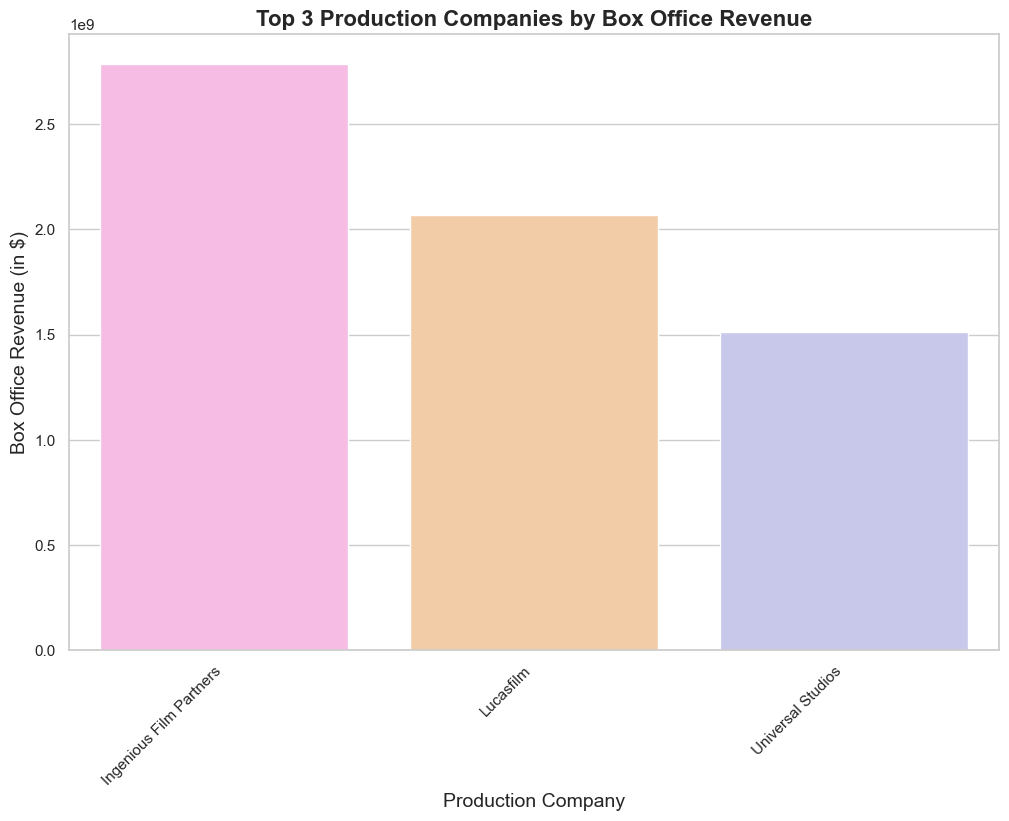

In [173]:
# Top 3 production companies by box office revenue
top_3_production_companies = movie_df[['production_company', 'box_office_revenue']].dropna().sort_values(by='box_office_revenue', ascending=False).head(3)

# Define a custom vibrant colormap with different colors
vibrant_cmap_production = LinearSegmentedColormap.from_list('vibrant_production', 
                                                           ['#ffb3e6', '#ffcc99', '#c2c2f0'])

# Set up the plot
plt.figure(figsize=(12, 8))

# Create the barplot with the vibrant color palette
sns.barplot(data=top_3_production_companies, 
            x='production_company', 
            y='box_office_revenue', 
            palette=vibrant_cmap_production(np.linspace(0, 1, len(top_3_production_companies))))

# Add title and labels
plt.title('Top 3 Production Companies by Box Office Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Production Company', fontsize=14)
plt.ylabel('Box Office Revenue (in $)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


C:\Users\rotar\AppData\Local\Temp\ipykernel_23652\715255590.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_movies_combined,
C:\Users\rotar\AppData\Local\Temp\ipykernel_23652\715255590.py:12: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=top_3_movies_combined,


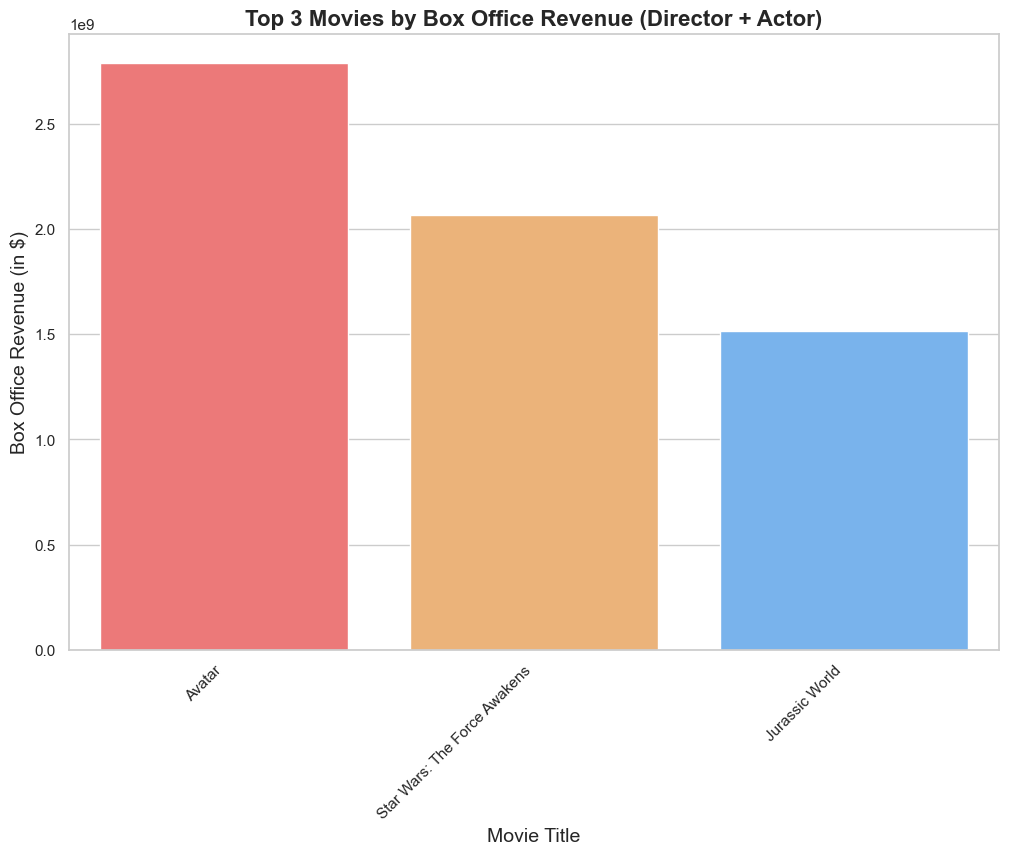

In [174]:
# Top 3 movies by box office revenue, categorized by director and actor
top_3_movies_combined = movie_df[['director', 'actor1', 'box_office_revenue', 'title']].dropna().sort_values(by='box_office_revenue', ascending=False).head(3)

# Define a custom vibrant colormap with different colors
vibrant_cmap_combined = LinearSegmentedColormap.from_list('vibrant_combined', 
                                                         ['#ff6666', '#ffb366', '#66b3ff'])

# Set up the plot
plt.figure(figsize=(12, 8))

# Create the barplot with the vibrant color palette
sns.barplot(data=top_3_movies_combined, 
            x='title', 
            y='box_office_revenue', 
            palette=vibrant_cmap_combined(np.linspace(0, 1, len(top_3_movies_combined))))

# Add title and labels
plt.title('Top 3 Movies by Box Office Revenue (Director + Actor)', fontsize=16, fontweight='bold')
plt.xlabel('Movie Title', fontsize=14)
plt.ylabel('Box Office Revenue (in $)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


# Pie Chart Visualization: Top 3 Actors by Average Movie Rating

This pie chart visualizes the distribution of the top 3 actors based on the average ratings of their movies. The chart presents the percentage share of each actor's average rating in a clear and intuitive way.

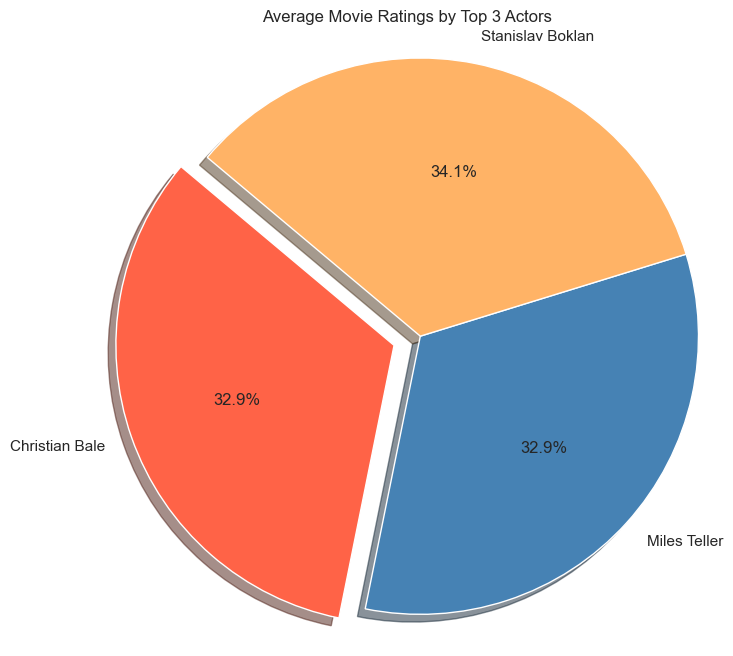

In [175]:
# Ensure 'average_rating' is a numeric type, coercing errors to NaN
movie_df['average_rating'] = pd.to_numeric(movie_df['average_rating'], errors='coerce')

# Top 3 best actors by average rating
top_3_actors = movie_df[['actor1', 'average_rating']].dropna().sort_values(by='average_rating', ascending=False).head(3)

# Count the number of trips for weekdays and weekends
# In this case, we're counting the average rating of movies for each actor
actor_ratings = top_3_actors.groupby('actor1')['average_rating'].mean()

# Define labels and sizes for the pie chart
labels = actor_ratings.index
sizes = actor_ratings.values

# Define the explode values for the slices (optional)
explode_slices = (0.1, 0, 0)  # Slightly "explode" the first slice (actor)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode_slices, shadow=True, colors=['#ff6347', '#4682b4', '#ffb366'])
plt.title('Average Movie Ratings by Top 3 Actors')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Top 3 Highest Grossing Movies by Box Office Revenue

In this chart, we showcase the top 3 movies with the highest box office revenue. The chart represents the percentage distribution of the revenue among these top 3 movies. Each section of the donut chart indicates the contribution of each movie to the total box office revenue of the top 3.

### Methodology:
1. **Data Selection**: The top 3 movies were selected based on their box office revenue, sorted in descending order.
2. **Visualization**: A donut chart was used to visually represent the proportion of each movie's revenue compared to the other top movies.

The chart is structured as a donut, with each slice corresponding to one of the top 3 films. The percentages on the chart represent the share of each movie's revenue out of the total top 3.

### Key Insights:
- The chart gives a clear picture of how much each of the top 3 highest-grossing movies contributed to the total revenue.
- This can help identify which films have had the most financial success in terms of box office performance.



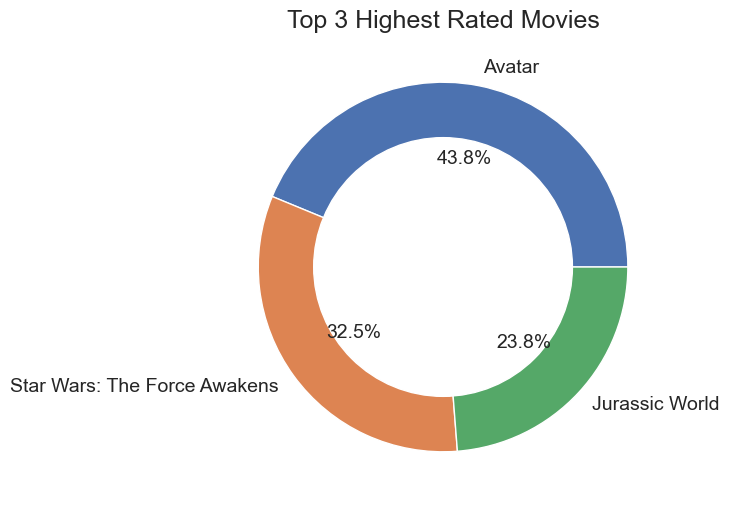

In [176]:
# Top 3 legjobb értékelésű filmek
top_3_highest_rated_movies = movie_df[['title', 'box_office_revenue']].dropna().sort_values(by='box_office_revenue', ascending=False).head(3)

# Új kategóriák
final_counts = top_3_highest_rated_movies.set_index('title')['box_office_revenue']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', textprops={'fontsize': 14},
        wedgeprops={'edgecolor': '#ffffff'})

# Circle to create a donut chart effect
circle = plt.Circle(xy=(0, 0), radius=0.7, color='white')
plt.gca().add_artist(circle)

# Add title
plt.title('Top 3 Highest Rated Movies', size=18)
plt.show()



## Top 3 Best Performing Movie Genres

This donut chart represents the **Top 3 Best Performing Genres** based on their total box office revenue. Each slice shows how much each genre contributed to the overall box office earnings.

### Methodology:
1. **Data Grouping**: The movies were grouped by their genre, and the total box office revenue for each genre was calculated.
2. **Top 3 Selection**: The top 3 genres with the highest total revenue were selected for this visualization.
3. **Chart Type**: A donut chart was chosen to effectively show the relative contribution of each genre.

### Insights:
- **Action** and **Drama** genres may dominate in terms of box office success, while **Comedy** and others might represent a smaller, but still significant, share.
- This chart helps understand which genres are more commercially successful and could assist in decision-making for future film production and investment.

### Conclusion:
By analyzing this chart, movie industry professionals can better understand the revenue distribution across genres, providing valuable insight for future project planning.


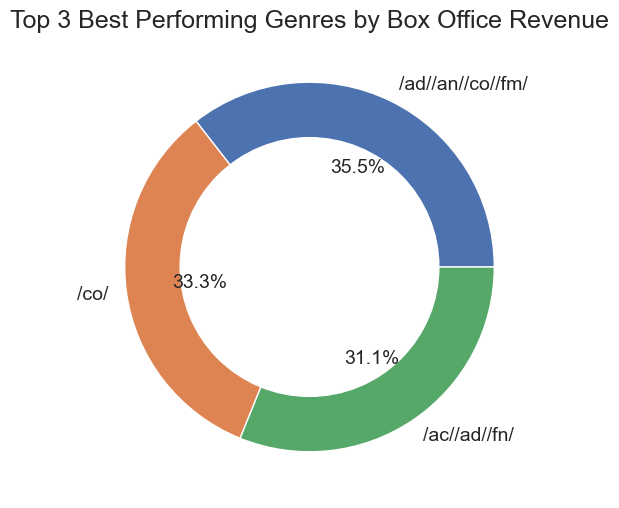

In [186]:
# Top 3 legjobb műfajok a box office bevételek alapján
top_3_best_genres = movie_df.groupby('genres')['box_office_revenue'].sum().nlargest(3)

# Új kategóriák
final_counts = top_3_best_genres

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', textprops={'fontsize': 14},
        wedgeprops={'edgecolor': '#ffffff'})

# Circle to create a donut chart effect
circle = plt.Circle(xy=(0, 0), radius=0.7, color='white')
plt.gca().add_artist(circle)

# Add title
plt.title('Top 3 Best Performing Genres by Box Office Revenue', size=18)
plt.show()


### 3D Szórásdiagram Vizualizáció

In [187]:
df2 = movie_df

In [188]:
df_x = df2[['production_cost', 'box_office_revenue', 'average_rating']]
df_y = df2['average_rating']
df_z = df2['year_released']

x = np.array(df_x)
y = np.array(df_y)
z = np.array(df_z)


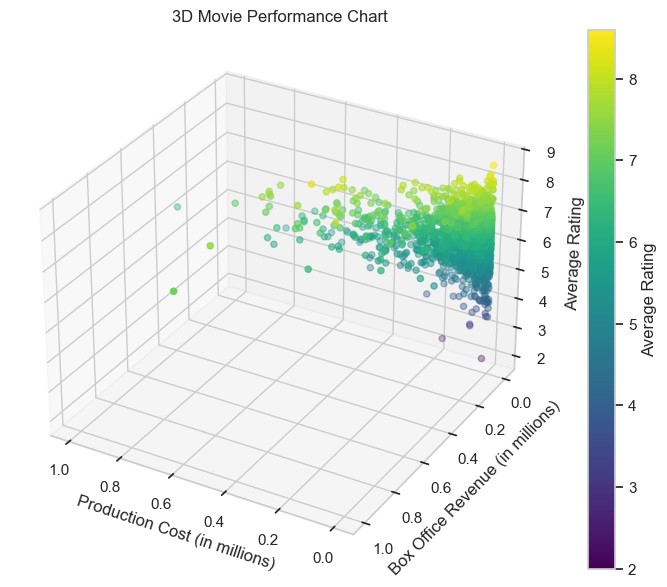

In [189]:
# Skálázd a 'Production Cost' és 'Box Office Revenue' értékeket külön-külön 0 és 1 közé
scaler_cost = MinMaxScaler()  # Production Cost skálázása
scaler_revenue = MinMaxScaler()  # Box Office Revenue skálázása

x[:, 0] = scaler_cost.fit_transform(x[:, 0].reshape(-1, 1)).flatten()  # Production Cost
x[:, 1] = scaler_revenue.fit_transform(x[:, 1].reshape(-1, 1)).flatten()  # Box Office Revenue


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot, ahol a szín az 'average_rating' szerint változik
scatter = ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=x[:, 2], cmap='viridis', marker='o')

# Tengelyek címkézése
ax.set_xlabel('Production Cost (in millions)')
ax.set_ylabel('Box Office Revenue (in millions)')
ax.set_zlabel('Average Rating')

# Színbar menü hozzáadása
cbar = plt.colorbar(scatter)
cbar.set_label('Average Rating')

# Tengelyek megfordítása
ax.set_xlim(ax.get_xlim()[::-1])  # X tengely megfordítása
ax.set_ylim(ax.get_ylim()[::-1])  # Y tengely megfordítása
#ax.set_zlim(ax.get_zlim()[::-1])  # Z tengely megfordítása

# Cím beállítása
plt.title("3D Movie Performance Chart")
plt.show()


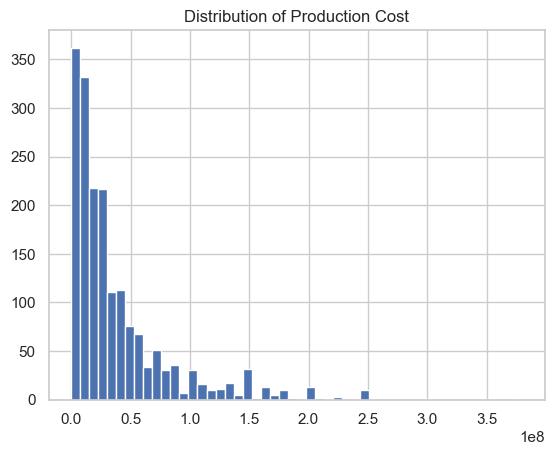

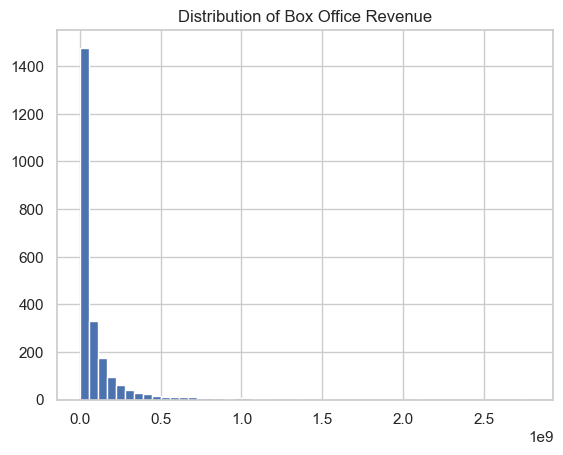

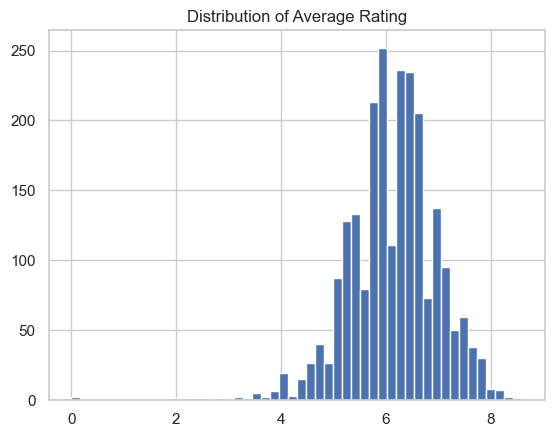

In [190]:

# Histogramok az egyes változókról
plt.hist(df_x['production_cost'], bins=50)
plt.title('Distribution of Production Cost')
plt.show()

plt.hist(df_x['box_office_revenue'], bins=50)
plt.title('Distribution of Box Office Revenue')
plt.show()

plt.hist(df_x['average_rating'], bins=50)
plt.title('Distribution of Average Rating')
plt.show()


In [191]:
# Save updated files
movie_df.to_csv("movies_updated_cleaned.csv", index=False)
movie_df_filtered.to_csv("movies_updated_filtered_cleaned.csv", index=False)
print("Files saved successfully.")

Files saved successfully.


In [192]:
# beep sound
frequency = 840  # Hz
duration = 1000  # milliseconds

winsound.Beep(frequency, duration)

print('Predictions have been made!')

Predictions have been made!
